In [1]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
np.random.seed(1234)

C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
import tensorflow as tf
import numpy as np 
import random
import math
from matplotlib import pyplot as plt
import os
import copy

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


In [7]:
df = pd.read_csv('household_power_consumption.txt',delimiter=';')
print(df.head())



         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


C:\Users\Apratim\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.columns


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [9]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [10]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [11]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [12]:
df.head(2)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [13]:
df=df.drop(['Global_reactive_power','Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [14]:
df.head(2)

,Date,Time,Global_active_power,Voltage,Global_intensity
0,16/12/2006,17:24:00,4.216,234.840,18.400
1,16/12/2006,17:25:00,5.360,233.630,23.000


In [15]:
df.isnull().sum()

Date                   0
Time                   0
Global_active_power    0
Voltage                0
Global_intensity       0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [17]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [18]:
df["DATE_TIME"] = pd.to_datetime(df.Date + " " + df["Time"])

In [19]:
df.head(2)

,Date,Time,Global_active_power,Voltage,Global_intensity,DATE_TIME
0,16/12/2006,17:24:00,4.216,234.840,18.400,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,233.630,23.000,2006-12-16 17:25:00


In [20]:
df=df.drop(['Date','Time'],axis=1)

In [21]:
df.head(2)

,Global_active_power,Voltage,Global_intensity,DATE_TIME
0,4.216,234.840,18.400,2006-12-16 17:24:00
1,5.360,233.630,23.000,2006-12-16 17:25:00


In [22]:
cal = calendar()
holidays = cal.holidays(start = df.DATE_TIME.min(), end = df.DATE_TIME.max())
df["IS_HOLIDAY"] = df.DATE_TIME.isin(holidays)

In [23]:
df.head(2)

,Global_active_power,Voltage,Global_intensity,DATE_TIME,IS_HOLIDAY
0,4.216,234.840,18.400,2006-12-16 17:24:00,False
1,5.360,233.630,23.000,2006-12-16 17:25:00,False


In [24]:
df.IS_HOLIDAY = df.IS_HOLIDAY.astype("int")

In [25]:
df.head(2)

,Global_active_power,Voltage,Global_intensity,DATE_TIME,IS_HOLIDAY
0,4.216,234.840,18.400,2006-12-16 17:24:00,0
1,5.360,233.630,23.000,2006-12-16 17:25:00,0


In [26]:
from sklearn.utils import shuffle

In [27]:
df.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
DATE_TIME              0
IS_HOLIDAY             0
dtype: int64

In [28]:
result=df.copy()

In [29]:
result.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
DATE_TIME              0
IS_HOLIDAY             0
dtype: int64

In [30]:
result.head(2)

,Global_active_power,Voltage,Global_intensity,DATE_TIME,IS_HOLIDAY
0,4.216,234.840,18.400,2006-12-16 17:24:00,0
1,5.360,233.630,23.000,2006-12-16 17:25:00,0


In [31]:
len(result)

2075259

In [32]:
result=result.drop(['DATE_TIME'],axis=1)

In [33]:
result.head(2)

,Global_active_power,Voltage,Global_intensity,IS_HOLIDAY
0,4.216,234.840,18.400,0
1,5.360,233.630,23.000,0


In [34]:
result.dtypes

Global_active_power    object
Voltage                object
Global_intensity       object
IS_HOLIDAY              int32
dtype: object

In [35]:
result.columns

Index(['Global_active_power', 'Voltage', 'Global_intensity', 'IS_HOLIDAY'], dtype='object')

In [36]:
result.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
IS_HOLIDAY             0
dtype: int64

In [37]:
result.dtypes

Global_active_power    object
Voltage                object
Global_intensity       object
IS_HOLIDAY              int32
dtype: object

In [38]:
result.Global_intensity = pd.to_numeric(result.Global_intensity,errors='coerce')

In [39]:
result.Global_active_power = pd.to_numeric(result.Global_active_power,errors='coerce')

In [40]:
result.Voltage = pd.to_numeric(result.Voltage,errors='coerce')

In [41]:
result.describe()

,Global_active_power,Voltage,Global_intensity,IS_HOLIDAY
count,2.049280e+06,2.049280e+06,2.049280e+06,2.075259e+06
mean,1.091615e+00,2.408399e+02,4.627759e+00,1.927470e-05
std,1.057294e+00,3.239987e+00,4.444396e+00,4.390255e-03
min,7.600000e-02,2.232000e+02,2.000000e-01,0.000000e+00
25%,3.080000e-01,2.389900e+02,1.400000e+00,0.000000e+00
50%,6.020000e-01,2.410100e+02,2.600000e+00,0.000000e+00
75%,1.528000e+00,2.428900e+02,6.400000e+00,0.000000e+00
max,1.112200e+01,2.541500e+02,4.840000e+01,1.000000e+00


In [42]:
result.isnull().sum()

Global_active_power    25979
Voltage                25979
Global_intensity       25979
IS_HOLIDAY                 0
dtype: int64

In [43]:
result=result.dropna()

In [44]:
result.head(2)

,Global_active_power,Voltage,Global_intensity,IS_HOLIDAY
0,4.216,234.84,18.4,0
1,5.360,233.63,23.0,0


In [45]:
row = int(round(0.9 * result.shape[0]))


In [46]:
train = result.iloc[:row,:]


In [47]:
# train = shuffle(train)

In [48]:
X_train = train.iloc[:, 1:].values.copy()
y_train = train.iloc[:, 0].values.copy().reshape(-1,1)
X_test = result.iloc[row:, 1:].values.copy()
y_test = result.iloc[row:, 0].values.copy().reshape(-1,1)

In [49]:
X_train[0]

array([234.84,  18.4 ,   0.  ])

In [50]:
y_train[0]

array([4.216])

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((1844352, 3), (1844352, 1), (204928, 3), (204928, 1))

In [52]:
result.dtypes

Global_active_power    float64
Voltage                float64
Global_intensity       float64
IS_HOLIDAY               int32
dtype: object

In [53]:
result.isnull().sum()

Global_active_power    0
Voltage                0
Global_intensity       0
IS_HOLIDAY             0
dtype: int64

In [54]:
## z-score transform x - not including those one-how columns!
for i in range(X_train.shape[1]-1):
    temp_mean = X_train[:, i].mean()
    temp_std = X_train[:, i].std()
    X_train[:, i] = (X_train[:, i] - temp_mean) / temp_std
    X_test[:, i] = (X_test[:, i] - temp_mean) / temp_std

In [55]:
## z-score transform y
y_mean = y_train.mean()
y_std = y_train.std()
y_train = (y_train - y_mean) / y_std
y_test = (y_test - y_mean) / y_std

In [56]:
X_train

array([[-1.81251377,  3.02995521,  0.        ],
       [-2.18035872,  4.04753029,  0.        ],
       [-2.28372011,  4.04753029,  0.        ],
       ...,
       [-0.18609186, -0.11125482,  0.        ],
       [-0.23777256, -0.11125482,  0.        ],
       [-0.20129207, -0.11125482,  0.        ]])

In [57]:
y_train

array([[ 2.88877053],
       [ 3.95269808],
       [ 3.96571817],
       ...,
       [-0.07795052],
       [-0.09283063],
       [-0.09469064]])

In [58]:
input_seq_len = 30
output_seq_len = 5

In [59]:
def generate_train_samples(x = X_train, y = y_train, batch_size = 10, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
 
    total_start_points = len(x) - input_seq_len - output_seq_len
    start_x_idx = np.random.choice(range(total_start_points), batch_size, replace = False)
 
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in start_x_idx]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
 
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in start_x_idx]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
 
    return input_seq, output_seq # in shape: (batch_size, time_steps, feature_dim)
 
def generate_test_samples(x = X_test, y = y_test, input_seq_len = input_seq_len, output_seq_len = output_seq_len):
 
    total_samples = x.shape[0]
 
    input_batch_idxs = [list(range(i, i+input_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    input_seq = np.take(x, input_batch_idxs, axis = 0)
 
    output_batch_idxs = [list(range(i+input_seq_len, i+input_seq_len+output_seq_len)) for i in range((total_samples-input_seq_len-output_seq_len))]
    output_seq = np.take(y, output_batch_idxs, axis = 0)
 
    return input_seq, output_seq

In [60]:
x, y = generate_train_samples()
print(x.shape, y.shape)
 
test_x, test_y = generate_test_samples()
print(test_x.shape, test_y.shape)

(10, 30, 3) (10, 5, 1)
(204893, 30, 3) (204893, 5, 1)


In [61]:
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes

In [62]:
from tensorflow.contrib import rnn
from tensorflow.python.ops import variable_scope
from tensorflow.python.framework import dtypes
import tensorflow as tf
import copy
import os

## Parameters
learning_rate = 0.01
lambda_l2_reg = 0.003  

## Network Parameters
# length of input signals
input_seq_len = input_seq_len
# length of output signals
output_seq_len = output_seq_len
keep_prob=0.5
# size of LSTM Cell
hidden_dim = 128 
# num of input signals
input_dim = X_train.shape[1]
# num of output signals
output_dim = y_train.shape[1]
# num of stacked lstm layers 
num_stacked_layers = 3 
# gradient clipping - to avoid gradient exploding
GRADIENT_CLIPPING = 2.5 

def build_graph(feed_previous = False):
    
    tf.reset_default_graph()
    
    global_step = tf.Variable(
                  initial_value=0,
                  name="global_step",
                  trainable=False,
                  collections=[tf.GraphKeys.GLOBAL_STEP, tf.GraphKeys.GLOBAL_VARIABLES])
    
    weights = {
        'out': tf.get_variable('Weights_out', \
                               shape = [hidden_dim, output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.truncated_normal_initializer()),
    }
    biases = {
        'out': tf.get_variable('Biases_out', \
                               shape = [output_dim], \
                               dtype = tf.float32, \
                               initializer = tf.constant_initializer(0.)),
    }
                                          
    with tf.variable_scope('Seq2seq'):
        # Encoder: inputs
        enc_inp = [
            tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
               for t in range(input_seq_len)
        ]

        # Decoder: target outputs
        target_seq = [
            tf.placeholder(tf.float32, shape=(None, output_dim), name="y".format(t))
              for t in range(output_seq_len)
        ]

        # Give a "GO" token to the decoder. 
        # If dec_inp are fed into decoder as inputs, this is 'guided' training; otherwise only the 
        # first element will be fed as decoder input which is then 'un-guided'
        dec_inp = [ tf.zeros_like(target_seq[0], dtype=tf.float32, name="GO") ] + target_seq[:-1]

        with tf.variable_scope('LSTMCell'): 
            cells = []
            for i in range(num_stacked_layers):
                with tf.variable_scope('RNN_{}'.format(i)):
                    cellss=tf.contrib.rnn.LSTMCell(hidden_dim)
                    cellss=tf.contrib.rnn.DropoutWrapper(cellss, output_keep_prob=keep_prob)
                    cells.append(cellss)
            cell = tf.contrib.rnn.MultiRNNCell(cells)
         
        def _rnn_decoder(decoder_inputs,
                        initial_state,
                        cell,
                        loop_function=None,
                        scope=None):
          """RNN decoder for the sequence-to-sequence model.
          Args:
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            initial_state: 2D Tensor with shape [batch_size x cell.state_size].
            cell: rnn_cell.RNNCell defining the cell function and size.
            loop_function: If not None, this function will be applied to the i-th output
              in order to generate the i+1-st input, and decoder_inputs will be ignored,
              except for the first element ("GO" symbol). This can be used for decoding,
              but also for training to emulate http://arxiv.org/abs/1506.03099.
              Signature -- loop_function(prev, i) = next
                * prev is a 2D Tensor of shape [batch_size x output_size],
                * i is an integer, the step number (when advanced control is needed),
                * next is a 2D Tensor of shape [batch_size x input_size].
            scope: VariableScope for the created subgraph; defaults to "rnn_decoder".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing generated outputs.
              state: The state of each cell at the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
                (Note that in some cases, like basic RNN cell or GRU cell, outputs and
                 states can be the same. They are different for LSTM cells though.)
          """
          with variable_scope.variable_scope(scope or "rnn_decoder"):
            state = initial_state
            outputs = []
            prev = None
            for i, inp in enumerate(decoder_inputs):
              if loop_function is not None and prev is not None:
                with variable_scope.variable_scope("loop_function", reuse=True):
                  inp = loop_function(prev, i)
              if i > 0:
                variable_scope.get_variable_scope().reuse_variables()
              output, state = cell(inp, state)
              outputs.append(output)
              if loop_function is not None:
                prev = output
          return outputs, state

        def _basic_rnn_seq2seq(encoder_inputs,
                              decoder_inputs,
                              cell,
                              feed_previous,
                              dtype=dtypes.float32,
                              scope=None):
          """Basic RNN sequence-to-sequence model.
          This model first runs an RNN to encode encoder_inputs into a state vector,
          then runs decoder, initialized with the last encoder state, on decoder_inputs.
          Encoder and decoder use the same RNN cell type, but don't share parameters.
          Args:
            encoder_inputs: A list of 2D Tensors [batch_size x input_size].
            decoder_inputs: A list of 2D Tensors [batch_size x input_size].
            feed_previous: Boolean; if True, only the first of decoder_inputs will be
              used (the "GO" symbol), all other inputs will be generated by the previous 
              decoder output using _loop_function below. If False, decoder_inputs are used 
              as given (the standard decoder case).
            dtype: The dtype of the initial state of the RNN cell (default: tf.float32).
            scope: VariableScope for the created subgraph; default: "basic_rnn_seq2seq".
          Returns:
            A tuple of the form (outputs, state), where:
              outputs: A list of the same length as decoder_inputs of 2D Tensors with
                shape [batch_size x output_size] containing the generated outputs.
              state: The state of each decoder cell in the final time-step.
                It is a 2D Tensor of shape [batch_size x cell.state_size].
          """
          with variable_scope.variable_scope(scope or "basic_rnn_seq2seq"):
            enc_cell = copy.deepcopy(cell)
            _, enc_state = rnn.static_rnn(enc_cell, encoder_inputs, dtype=dtype)
            if feed_previous:
                return _rnn_decoder(decoder_inputs, enc_state, cell, _loop_function)
            else:
                return _rnn_decoder(decoder_inputs, enc_state, cell)

        def _loop_function(prev, _):
          '''Naive implementation of loop function for _rnn_decoder. Transform prev from 
          dimension [batch_size x hidden_dim] to [batch_size x output_dim], which will be
          used as decoder input of next time step '''
          return tf.matmul(prev, weights['out']) + biases['out']
        
        dec_outputs, dec_memory = _basic_rnn_seq2seq(
            enc_inp, 
            dec_inp, 
            cell, 
            feed_previous = feed_previous
        )

        reshaped_outputs = [tf.matmul(i, weights['out']) + biases['out'] for i in dec_outputs]
        
    # Training loss and optimizer
    with tf.variable_scope('Loss'):
        # L2 loss
        output_loss = 0
        for _y, _Y in zip(reshaped_outputs, target_seq):
            output_loss += tf.reduce_mean(tf.pow(_y - _Y, 2))

        # L2 regularization for weights and biases
        reg_loss = 0
        for tf_var in tf.trainable_variables():
            if 'Biases_' in tf_var.name or 'Weights_' in tf_var.name:
                reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))

        loss = output_loss + lambda_l2_reg * reg_loss

    with tf.variable_scope('Optimizer'):
        optimizer = tf.contrib.layers.optimize_loss(
                loss=loss,
                learning_rate=learning_rate,
                global_step=global_step,
                optimizer='Adam',
                clip_gradients=GRADIENT_CLIPPING)
        
    saver = tf.train.Saver
    
    return dict(
        enc_inp = enc_inp, 
        target_seq = target_seq, 
        train_op = optimizer, 
        loss=loss,
        saver = saver, 
        reshaped_outputs = reshaped_outputs,
        )

In [63]:

total_iteractions = 200
batch_size = 16
KEEP_RATE = 0.5
train_losses = []
val_losses = []

x = np.linspace(0, 40, 130)
train_data_x = x[:110]

rnn_model = build_graph(feed_previous=False)

saver = tf.train.Saver()

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    print("Training losses: ")
    for i in range(total_iteractions):
        batch_input, batch_output = generate_train_samples(batch_size=batch_size)
        
        feed_dict = {rnn_model['enc_inp'][t]: batch_input[:,t] for t in range(input_seq_len)}
        feed_dict.update({rnn_model['target_seq'][t]: batch_output[:,t] for t in range(output_seq_len)})
        _, loss_t = sess.run([rnn_model['train_op'], rnn_model['loss']], feed_dict)
        print(loss_t)
        
    temp_saver = rnn_model['saver']()
    save_path = temp_saver.save(sess, os.path.join('./', 'testcase1_household'))
        
print("Checkpoint saved at: ", save_path)

Training losses: 
4.3277717
9.559567
231.20137
106.592804
133.8429
81.7164
10.527335
4.5895762
4.554921
10.184154
4.852574
4.4439936
2.1093779
3.3406746
2.4973624
1.1927873
2.4681153
4.765647
2.1289527
2.4486425
2.068571
1.5076939
0.98969877
1.9429874
2.4558463
0.99214107
2.552908
1.8159492
1.7418237
0.887602
1.0565621
1.3507882
1.3551472
0.7102809
1.0629314
2.5710194
1.9492128
0.9333234
0.99779564
2.8018172
1.233097
1.683058
1.7685297
2.0067122
1.4607708
1.0103941
2.2375355
1.5974505
0.6986107
0.818694
0.42034808
0.5480157
0.71011287
0.8457583
1.353249
0.86639535
0.67073363
1.2346315
2.5371897
1.1729406
1.2284392
1.8286439
0.63973844
0.5620942
0.9420563
1.3485554
0.5840678
1.0106639
1.0171763
0.5482055
0.6284841
1.4562938
0.9310143
0.8235156
1.155145
1.2137278
1.1610072
2.2856646
2.0869164
0.6966004
0.64999855
1.9488671
4.456768
2.8880394
0.9576115
0.3578588
0.77134216
1.2468759
0.47996843
1.4522238
0.5615394
0.9413335
0.98310053
0.9330342
0.7430516
1.3518542
0.57901174
0.58613974
0.4

In [64]:
rnn_model = build_graph(feed_previous=True)

init = tf.global_variables_initializer()
with tf.Session() as sess:

    sess.run(init)
    
    saver = rnn_model['saver']().restore(sess,  os.path.join('./', 'testcase1_household'))
    
    feed_dict = {rnn_model['enc_inp'][t]: test_x[:, t, :] for t in range(input_seq_len)} # batch prediction
    feed_dict.update({rnn_model['target_seq'][t]: np.zeros([test_x.shape[0], output_dim], dtype=np.float32) for t in range(output_seq_len)})
    final_preds = sess.run(rnn_model['reshaped_outputs'], feed_dict)
    
    final_preds = [np.expand_dims(pred, 1) for pred in final_preds]
    final_preds = np.concatenate(final_preds, axis = 1)
    print("Test mse is: ", np.mean((final_preds - test_y)**2))

INFO:tensorflow:Restoring parameters from ./testcase1_household
Test mse is:  0.510895587938675


In [65]:
## remove duplicate hours and concatenate into one long array
test_y_expand = np.concatenate([test_y[i].reshape(-1) for i in range(0, test_y.shape[0], 100)], axis = 0)
final_preds_expand = np.concatenate([final_preds[i].reshape(-1) for i in range(0, final_preds.shape[0], 100)], axis = 0)

In [66]:
test_y[i]

array([[-0.67687477],
       [-0.6805948 ],
       [-0.68431482],
       [-0.68617484],
       [-0.68617484]])

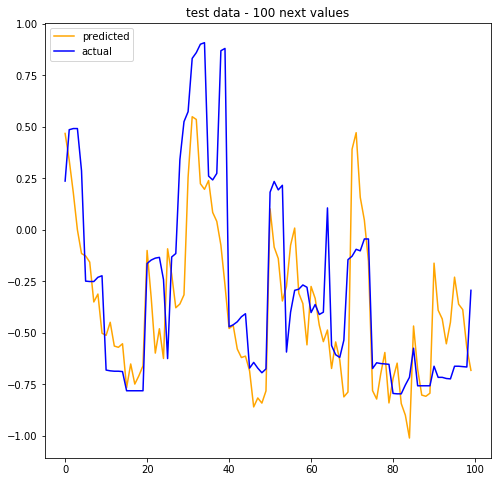

In [72]:
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(final_preds_expand[:100], color = 'orange', label = 'predicted')
ax.plot(test_y_expand[:100], color = 'blue', label = 'actual')
plt.title("test data - 100 next values")
plt.legend(loc="upper left")
plt.show()